Epoch [20/300], Loss: 113.9123
Epoch [40/300], Loss: 25.9184
Epoch [60/300], Loss: 16.7040
Epoch [80/300], Loss: 13.6173
Epoch [100/300], Loss: 11.9628
Epoch [120/300], Loss: 10.9092
Epoch [140/300], Loss: 10.1636
Epoch [160/300], Loss: 9.5962
Epoch [180/300], Loss: 9.1548
Epoch [200/300], Loss: 8.7633
Epoch [220/300], Loss: 8.4362
Epoch [240/300], Loss: 8.1513
Epoch [260/300], Loss: 7.9062
Epoch [280/300], Loss: 7.6786
Epoch [300/300], Loss: 7.4687
Mean Squared Error on test set: 11.7959


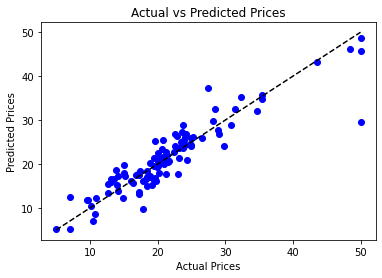

In [1]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. 加载并预处理数据
# 加载波士顿房价数据集
boston = load_boston()
X, y = boston.data, boston.target

# 数据标准化和划分训练集、测试集
scaler = StandardScaler()
X = scaler.fit_transform(X)  # 标准化特征数据
y = y.reshape(-1, 1)  # 将目标值变成二维向量，以便PyTorch处理

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 转换数据为PyTorch张量
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# 2. 定义BP神经网络模型
class BPHousingNetwork(nn.Module):
    def __init__(self):
        super(BPHousingNetwork, self).__init__()
        # 定义网络层
        self.fc1 = nn.Linear(13, 64)  # 输入层到第一个隐藏层
        self.fc2 = nn.Linear(64, 32)  # 第一个隐藏层到第二个隐藏层
        self.fc3 = nn.Linear(32, 1)   # 第二个隐藏层到输出层

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用ReLU激活函数
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # 输出层，回归任务不使用激活函数
        return x

# 实例化模型
model = BPHousingNetwork()

# 3. 定义损失函数和优化器
criterion = nn.MSELoss()  # 均方误差损失函数
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 训练模型
num_epochs = 300
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # 反向传播和优化
    optimizer.zero_grad()  # 梯度清零
    loss.backward()        # 计算梯度
    optimizer.step()       # 更新权重

    # 每隔20轮打印一次损失值
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# 5. 测试模型
model.eval()  # 设置模型为评估模式
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f"Mean Squared Error on test set: {test_loss.item():.4f}")

# 可视化测试集的真实值和预测值
plt.scatter(y_test, predictions, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


Epoch [20/300], Loss: 0.7154
Epoch [40/300], Loss: 0.4654
Epoch [60/300], Loss: 0.4082
Epoch [80/300], Loss: 0.3827
Epoch [100/300], Loss: 0.3670
Epoch [120/300], Loss: 0.3540
Epoch [140/300], Loss: 0.3409
Epoch [160/300], Loss: 0.3274
Epoch [180/300], Loss: 0.3144
Epoch [200/300], Loss: 0.3032
Epoch [220/300], Loss: 0.2943
Epoch [240/300], Loss: 0.2875
Epoch [260/300], Loss: 0.2825
Epoch [280/300], Loss: 0.2784
Epoch [300/300], Loss: 0.2753
Test MSE: 0.2967


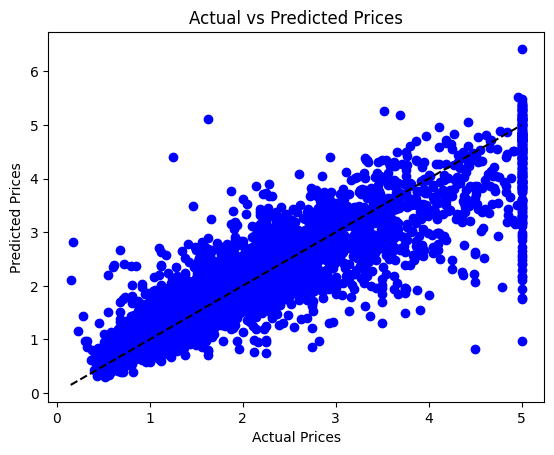

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing  # 替换为加州房价数据集
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 加载加州房价数据集（替代波士顿数据集）
data = fetch_california_housing()
X, y = data.data, data.target

# 数据标准化和划分训练集、测试集
scaler = StandardScaler()
X = scaler.fit_transform(X)  # 标准化特征数据
y = y.reshape(-1, 1)         # 将目标值变成二维向量，以便PyTorch处理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 转换数据为PyTorch张量
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# 定义BP神经网络模型
class HousingNetwork(nn.Module):
    def __init__(self):
        super(HousingNetwork, self).__init__()
        # 定义网络层（缩进在 __init__ 内部）
        self.fc1 = nn.Linear(8, 64)  # 输入特征数为8（加州数据集）
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # 回归任务输出层不使用激活函数
        return x

# 实例化模型
model = HousingNetwork()
criterion = nn.MSELoss()  # 均方误差损失函数
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 300
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # 反向传播和优化（缩进在循环内部）
    optimizer.zero_grad()  # 梯度清零
    loss.backward()        # 计算梯度
    optimizer.step()       # 更新权重
    
    # 每隔20轮打印一次损失值
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# 测试模型
model.eval()  # 设置模型为评估模式
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f"Test MSE: {test_loss.item():.4f}")
    
    # 绘制预测结果
    plt.scatter(y_test, predictions.numpy(), color='blue')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Prices")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.show()